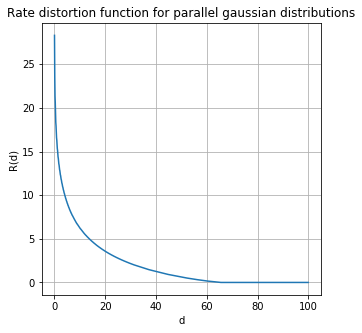

In [1]:
import numpy as np
from math import log2
from matplotlib import pyplot as plt


def oneRDF(var, d):
    """ rate distortion function for Gaussian source

    Args:
        var: variance
        d: expected distorion constraint
    """
    if d > var:
        return 0
    else:
        return log2(var/d) / 2


def rdf(sigmas, d, m):
    """rate distortion function for parallel gaussian source

    Args:
        sigmas: array-like consists of standard deviations
        d: expected distortion constraint
    """
    eps = 0.05
    variances = [i*i for i in sigmas]
    lambdas = np.arange(0.01, sum(variances), 0.01)
    if lambdas[-1] < d:
        return 0
    for lam in lambdas:
        d_sum = 0
        rdfVal = 0
        for v in variances:
            if lam < v:
                d_sum += lam
                rdfVal += oneRDF(v, lam)
            else:
                d_sum += v
        if abs(d - d_sum) < eps:
            return rdfVal
    return -1


if __name__ == "__main__":
    m = 6
    sigmas = np.linspace(1.0, 5.0, m)
    d_arr = np.arange(0.1, 100.0, 0.1)
    fig, ax = plt.subplots(figsize=(5, 5))
    rdf_val = []
    for d in d_arr:
        rdf_val.append(rdf(sigmas, d, m))
    ax.plot(d_arr, rdf_val)
    ax.set_title(
        "Rate distortion function for parallel gaussian distributions")
    ax.set_xlabel("d")
    ax.set_ylabel("R(d)")
    ax.grid(True)
    plt.show()
